In [79]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture
import warnings

In [80]:
pwd

'/Users/ray/2021datathon/clustering'

In [81]:
df_1 = pd.read_csv('../team_att_all_cleaned.csv')

In [82]:
id_fts = [
    'team_id', # will be dropped during clustering
    'date', # will be dropped during clustering
    'next_date'
]

features = df_1.columns.values.tolist()
for id_ft in id_fts:
    features.remove(id_ft) 

print(features)

['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth', 'buildUpPlayPositioningClass_Free Form', 'buildUpPlayPositioningClass_Organised', 'chanceCreationPositioningClass_Free Form', 'chanceCreationPositioningClass_Organised', 'defenceDefenderLineClass_Cover', 'defenceDefenderLineClass_Offside Trap', 'buildUpPlayDribbling', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_right', 'preferred_foot_left', 'at

In [83]:
df_1 = df_1[df_1['buildUpPlayDribbling'] != 0]
df_2 = df_1.drop(['team_id', 'date', 'next_date'], axis = 1)

In [84]:
# Normalization
df_3 = pd.DataFrame(MinMaxScaler().fit_transform(df_2), columns=df_2.columns, index=df_2.index)
df_3.shape

(931, 60)

In [29]:
Nc = range(1, 51)
kmeans = [KMeans(n_clusters = n) for n in Nc]
score = np.array([kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))])

In [112]:
Nc2 = range(1,31)
gm = [GaussianMixture(n_components=n,covariance_type="tied",random_state=42).fit(df_3) for n in Nc2]

In [113]:
aic = np.array([gm[i].aic(df_3) for i in range(len(gm))])
bic = np.array([gm[i].bic(df_3) for i in range(len(gm))])

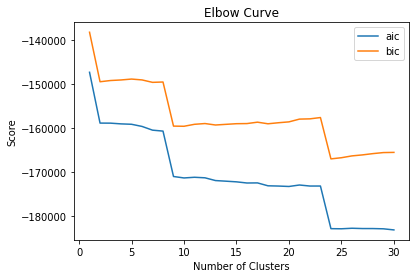

In [114]:
plt.plot(Nc2,aic,label='aic')
plt.plot(Nc2,bic,label='bic')
plt.legend(loc='best')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# from the graph, we need 10 clusters to describe team attributes.
# TODO verify this result with other methods

In [20]:
kmeans = KMeans(n_clusters = 10)
df_1['cluster'] = kmeans.fit_predict(df_2)
df_1['cluster'].value_counts(dropna = False)

6    125
0    122
7    118
1    115
3    114
8     96
4     93
2     55
9     49
5     44
Name: cluster, dtype: int64

In [121]:
gmm = GaussianMixture(n_components=9,covariance_type="tied",random_state=42)
df_1['cluster'] = gmm.fit_predict(df_2)
df_1['cluster'].value_counts(dropna = False)

5    222
4    184
2    154
0     76
8     70
3     65
6     60
1     57
7     43
Name: cluster, dtype: int64

In [122]:
df_1.to_csv("team_att_all_w_cluster_gmm9.csv")